In [89]:
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from matplotlib import style
%matplotlib inline
import pandas_datareader as web
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import datetime, quandl
import pandas as pd
from dataScrape import scrape1
import matplotlib.dates as mdates
import plotly.express as pe
import requests
import bs4 as bs
import datetime, quandl
import time
import PyQt5
import numpy as np
import os
import sqlite3
from sqlite3 import Error
import PyQt5
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 18})

style.use('seaborn-ticks')
style.use('dark_background')


The Libraries used are to be installed within the python 3 environment for the code to execute.


In [90]:
class scrape1:

    def web(self,industry):

        req = requests.get('https://www.forbes.com/global2000/list/#tab:overall')
        bsoup = bs.BeautifulSoup(req.text, features="lxml")
        table = bsoup.find('table')
        company = []
        # print(table)
        for row in table.findAll('td'):

            company = row.findAll('td',{"class":"name"})
    
        return table
        #store the companies in the separate database
        
    def createDB(self,db_file,delete_db=True):
        
        # The creation of database to store tables
        # 1. The Stock prices for the S&P 500 companies
        # 2. The second database stores the dates where any particular announcement regarding the US - China policy occured 
        # 3. The stock prices for all the comapnies to be analysed - the data is crawled using the wikipedia scraping and the yahoo api   
        
        try:
            conn = sqlite3.connect(db_file)
            return conn
        except Error as e:
                print(e)

    def SP_database(self,company,start,end):
        
        # This function creates the Database for stock market index S&P 500 if not present else it fetched the stock prices from the table 
        # for the given time period
        # For the first run the functinon reuqires tp be called 2 times - the database is created and the function needs to be called again to fetch the data 
        
        start = start
        end = end

        
        if os.path.exists('SPdb2.db'):

            SPdb = sqlite3.connect('SPdb2.db')
            dfSP = pd.read_sql_query("SELECT * FROM " + str(company).strip('^') + " WHERE Date BETWEEN '" +str(start)+ "' AND '" +str(end)+"'", SPdb)
            
            return dfSP
        
        elif not os.path.exists('SPdb2.db'):
            try:
                SPdb = sqlite3.connect('SPdb2.db')
            except Error as e:
                print(e)
            df = web.DataReader(company, 'yahoo', start, end)
            
            # The stock prices are very volatile when for the daily change. Thus the 100 moving average is calculated to smooth out the data  
            
            df['100ma'] = df['Adj Close'].rolling(window=100).mean()
            df.dropna(inplace=True)
            df.to_sql(str(company).strip('^'), SPdb, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None,
                          method=None)
            
            SPdb.commit()
            return df    
        

    def sp500_data(self,company,start,end):
        
        # The function crawls the wikipedia page to identify the tickers for a company and then stores them in a list whichh then 
        # is used to query the yahoo api and the results are stored in the separate table
        
        start_default = start
        end_default = end
        reque = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
        soup = bs.BeautifulSoup(reque.text, 'lxml')
        pgtable = soup.find('table', {'class': 'wikitable sortable'})
        ticks = ['TSLA']
        companies = ['TSLA','F','BA','FCX','GM','X']
        
        for row in pgtable.findAll('tr')[1:]:
            
                tick = row.findAll('td')[0].text
                if tick.strip('\n') in companies:
                    ticks.append(tick.strip('\n'))
        
      
        if os.path.exists('sp500.db'):

            print('Already DB present')
            connec500 = sqlite3.connect('sp500.db')
            df = pd.read_sql_query("SELECT * FROM " + company + " WHERE Date BETWEEN '" +str(start_default )+ "' AND '" +str(end_default)+"'", connec500)
            
            return df

        elif not os.path.exists('sp500.db'):
            try:
                connec500 = sqlite3.connect('sp500.db')
            except Error as e:
                print(e)
            for names in ticks:
                time.sleep(5)
                
                df = web.DataReader(names, 'yahoo', start_default, end_default)
                df['100ma'] = df['Adj Close'].rolling(window=100).mean()
                df.dropna(inplace=True)
                df.to_sql(names, connec500, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None,
                          method=None)
                connec500.commit()
            #     
            # connec501 = sqlite3.connect('sp500.db')
            # 
            # df = pd.read_sql_query("SELECT * FROM " + company + " WHERE Date BETWEEN '" +str(start_default )+ "' AND '" +str(end_default)+"'",
            #                        connec501)

            print("Data base created please execute again now")

In [91]:
db_file = "SPdb2.db"
def createDBDate(db_file):
        # This function creates the database which stores the important dates which are used to identify the stock impact on each company
        try:
            connDate = sqlite3.connect(db_file)
            
        except Error as e:
                print(e)
        # create an array of 5 dates starting at '2015-02-24', one per day
        rng = pd.date_range('2019-02-24', periods=24, freq='10D')
        df = pd.DataFrame({ 'Date': rng, 'Val' : np.random.randn(len(rng))})
        
        df.to_sql('Dates', connDate , if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None,method=None)
        
        return df
        


In [92]:
db_file = "SPdb2.db"
a  = createDBDate(db_file)


In [93]:
def dropPoints():
    # the database for the dates and the company stock market data is then compared together using the inner join within the 
    # sqlite database of the S&P500 database to display the effect of the trade tarrifs based on the dates   
    
    
    SP500Con = sqlite3.connect("SPdb2.db")
    cursor = SP500Con.cursor()
    cursor.execute("""SELECT *
                       FROM GSPC
                       JOIN Dates
                       ON GSPC.Date= Dates.Date
                       """)
    ViewData = cursor.fetchall()
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               
    SP500Con.commit()
    date = []
    moving = []
    for i in ViewData:
        date.append(i[0])
        moving.append(i[4])    
    return date, moving  
    


In [94]:
import matplotlib

def plotSingle(scrapeObj,start,end,company):
    
        # The function reads the data from the sql table within the given date range and plots the candle stick graphs for the  
        # s&P stock and the each company under the analysis
        
        
        fig = plt.figure()
        fig.subplots_adjust(hspace=1.4)
        #the first arg is row*col second one is starting point for the graphs
        
        scraoeObj = scrapeObj
        if(company == "^GSPC"):
            
            df2 = scrapeObj.SP_database(company,start,end)
            
        else:   
            df2 = scrapeObj.sp500_data(company,start,end)
        df2 = df2.set_index(pd.DatetimeIndex(df2['Date']))
        df2['100ma'] = df2['Adj Close'].rolling(window=100).mean()
        
        df2.dropna(inplace=True)
        
        
        # The adjusted close and the vloume is sampled to the 10 days data to take under consideeration that any effect of the tarrif 
        # are only reflected after a certain amount of time
        
        df_ohlc = df2['Adj Close'].resample('10D').ohlc()
        df_volume = df2['Volume'].resample('10D').sum()
        
        df_ohlc.reset_index(inplace=True)
        
        
        df_ohlc['Date'] = pd.to_datetime(df_ohlc['Date']).dt.date
        df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
        
  
        ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
        ax2 = plt.subplot2grid((6, 1), (5, 0), rowspan=1, colspan=1, sharex=ax1)
        ax1.xaxis_date()
    
        candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
        ax1.plot(df2.index, df2['Adj Close'],linewidth= 0.25)
        
        ax1.title.set_text(company + ' Stock Performance')
        ax1.set_xlabel('Date Range')
        ax1.set_ylabel('Stock Price')
        
        ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0,facecolor='g')
        ax2.title.set_text(company + ' Stock Volume')
        ax2.set_xlabel('Date Range')
        ax2.set_ylabel('Stock Volume')
        fig=plt.figure(figsize=(60, 60), dpi= 80, facecolor='w', edgecolor='k')
        
    



Already DB present


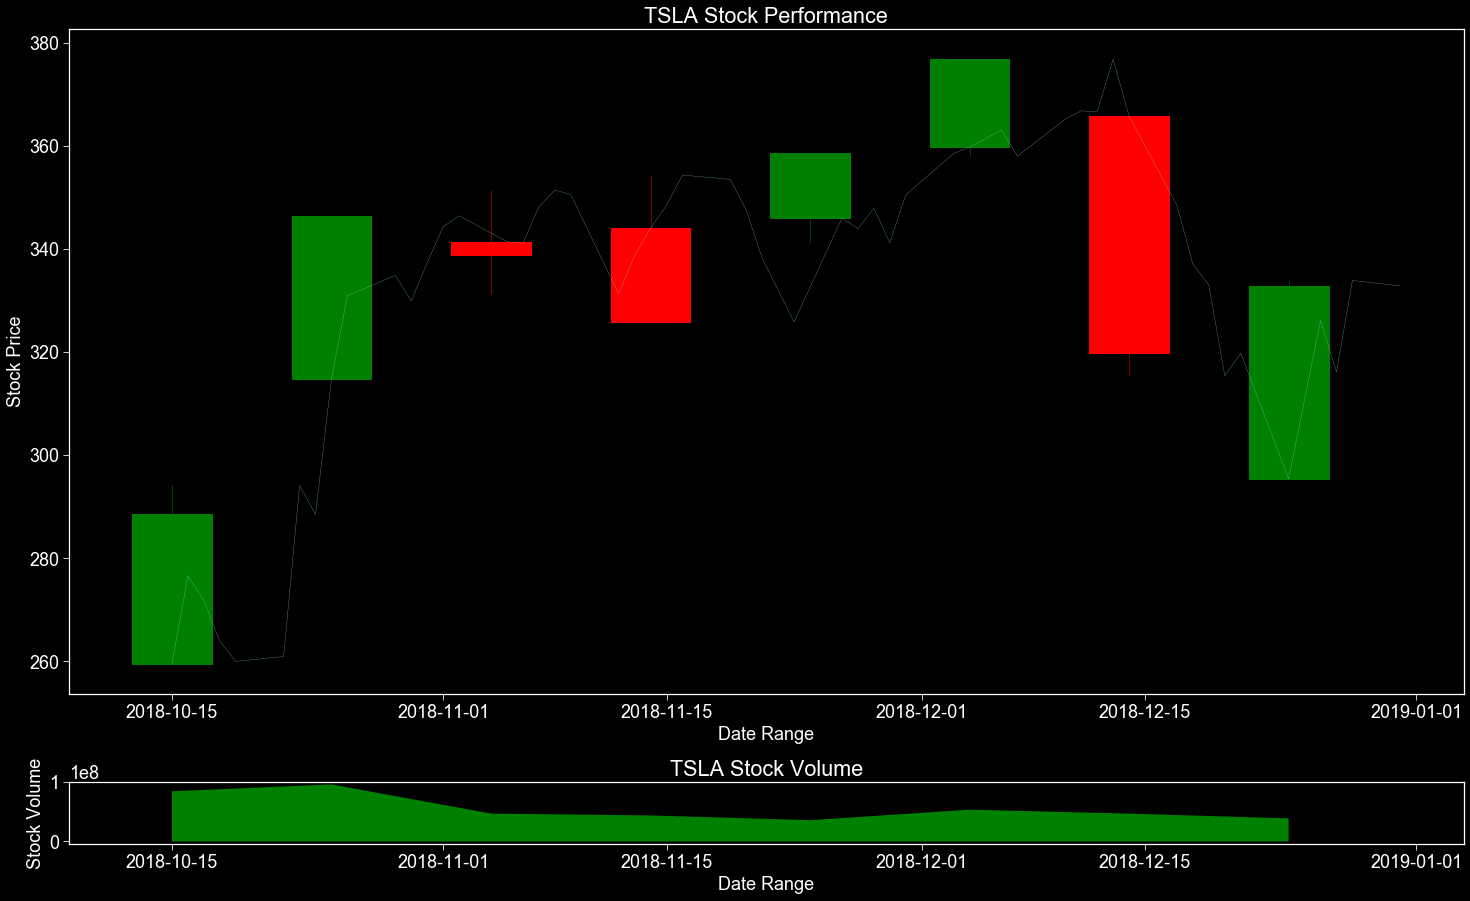

<Figure size 4800x4800 with 0 Axes>

In [95]:


start = dt.datetime(2018, 1, 1)
end = dt.datetime(2019, 1, 1)
company = 'TSLA'
scrapeObj = scrape1()
plotSingle(scrapeObj,start,end,company)



In [82]:
def plotDrop(scrapeObj,start,end,company):

        fig = plt.figure()
        fig.subplots_adjust(hspace=1.4)
        #the first arg is row*col second one is starting point for the graphs
    
        scraoeObj = scrapeObj
        if(company == "^GSPC"):
            
            df1 = scrapeObj.SP_database(company,start,end)
            
        else:
            df1 = scrapeObj.sp500_data(company,start,end)
        
        df1 = df1.set_index(pd.DatetimeIndex(df1['Date']))
        df1.dropna(inplace=True)
        
        df_ohlc = df1['Adj Close'].resample('2D').ohlc()
        
        df_ohlc.reset_index(inplace=True)
        df_ohlc['Date'] = pd.to_datetime(df_ohlc['Date']).dt.date
        df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
        
        ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
        ax1.xaxis_date()
        
        x,y = dropPoints()
        ax1.scatter(x, y)
        ax1.plot(df1.index, df1['Adj Close'],linewidth= 1)
        ax1.title.set_text(company + ' Stock Performance')
        ax1.set_xlabel('Date Range')
        ax1.set_ylabel('Stock Price')
        
        plt.show()
    



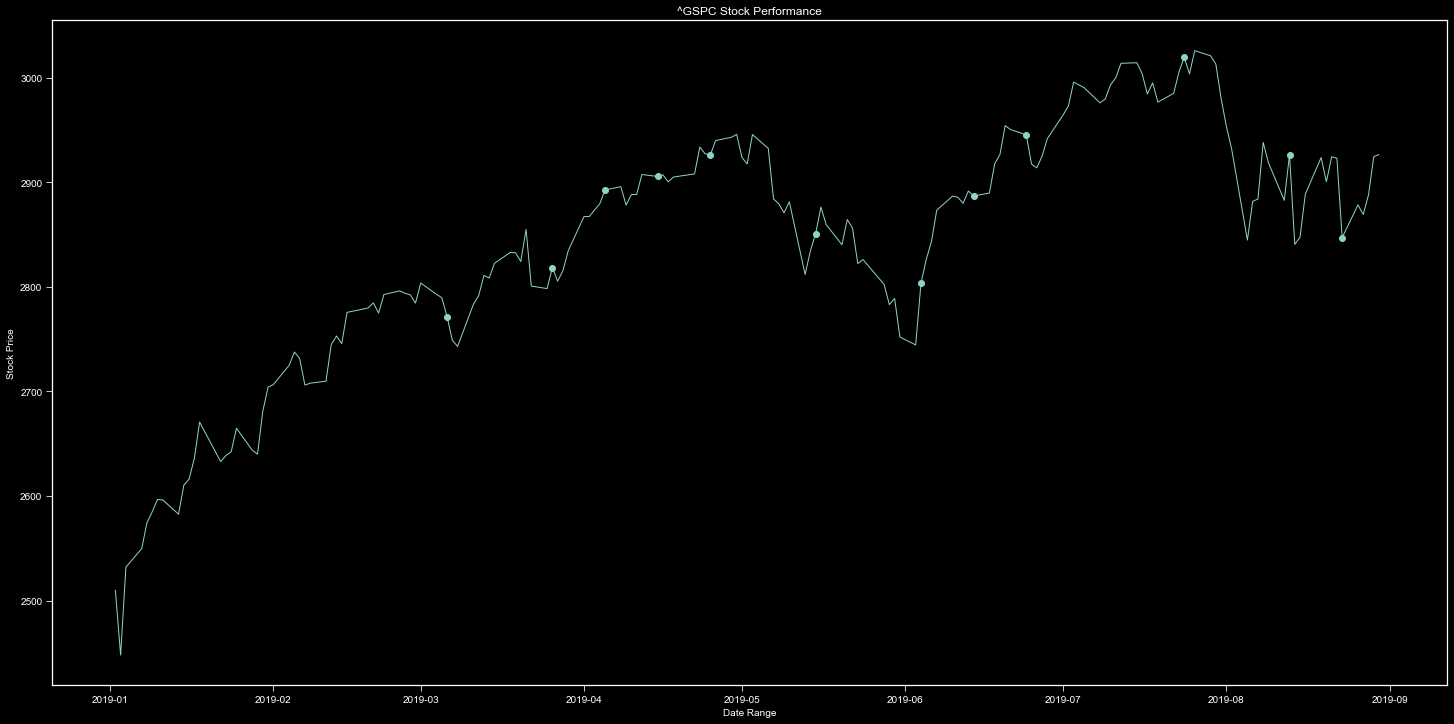

In [83]:


start = dt.datetime(2019, 1, 1)
end = dt.datetime(2019, 8, 30)
company = '^GSPC'
scrapeObj = scrape1()
plotDrop(scrapeObj,start,end,company)

In [84]:
def countryIndustry(path):
    countryData = pd.read_excel(path)
    try:
        connec500 = sqlite3.connect('sp500.db')
    except Error as e:
        print(e)
    
    countryData.to_sql(str(path).strip('.xlsx'), connec500, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None,
                  method=None)
    connec500.commit()
    countryData = pd.read_sql_query("SELECT * FROM " + str(path).strip('.xlsx'), connec500)
    
    countries = countryData['Country']
    
    bronzes = np.array(countryData['Country'])
    
    
    silvers = np.array([14,10,8,8,6])
    golds = np.array([14,14,11,9,8])
    ind = [country for country in countries]
 
    plt.bar(ind, golds, width=0.6, label='golds', color='gold', bottom=silvers+bronzes)
    plt.bar(ind, silvers, width=0.6, label='silvers', color='silver', bottom=bronzes)
    plt.bar(ind, bronzes, width=0.6, label='bronzes', color='#CD7F32')
 

    
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()

    
    

In [ ]:
#import xlrd for the excel read function
def pieChart(path):
    
    dhData = pd.read_excel(path)
    try:
        connec500 = sqlite3.connect('sp500.db')
    except Error as e:
        print(e)
    
    dhData.to_sql(str(path).strip('.xlsx'), connec500, if_exists='replace', index=True, index_label=None, chunksize=None, dtype=None,
                  method=None)
    connec500.commit()
    dhDataSelect = pd.read_sql_query("SELECT * FROM " + str(path).strip('.xlsx'), connec500)
    labels = dhDataSelect['Manufacturer']
    sizes = dhDataSelect['YTD']
    
    
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.show()
    



C:\Python37\lib\site-packages\pandas\core\generic.py:2713: UserWarning:

The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.



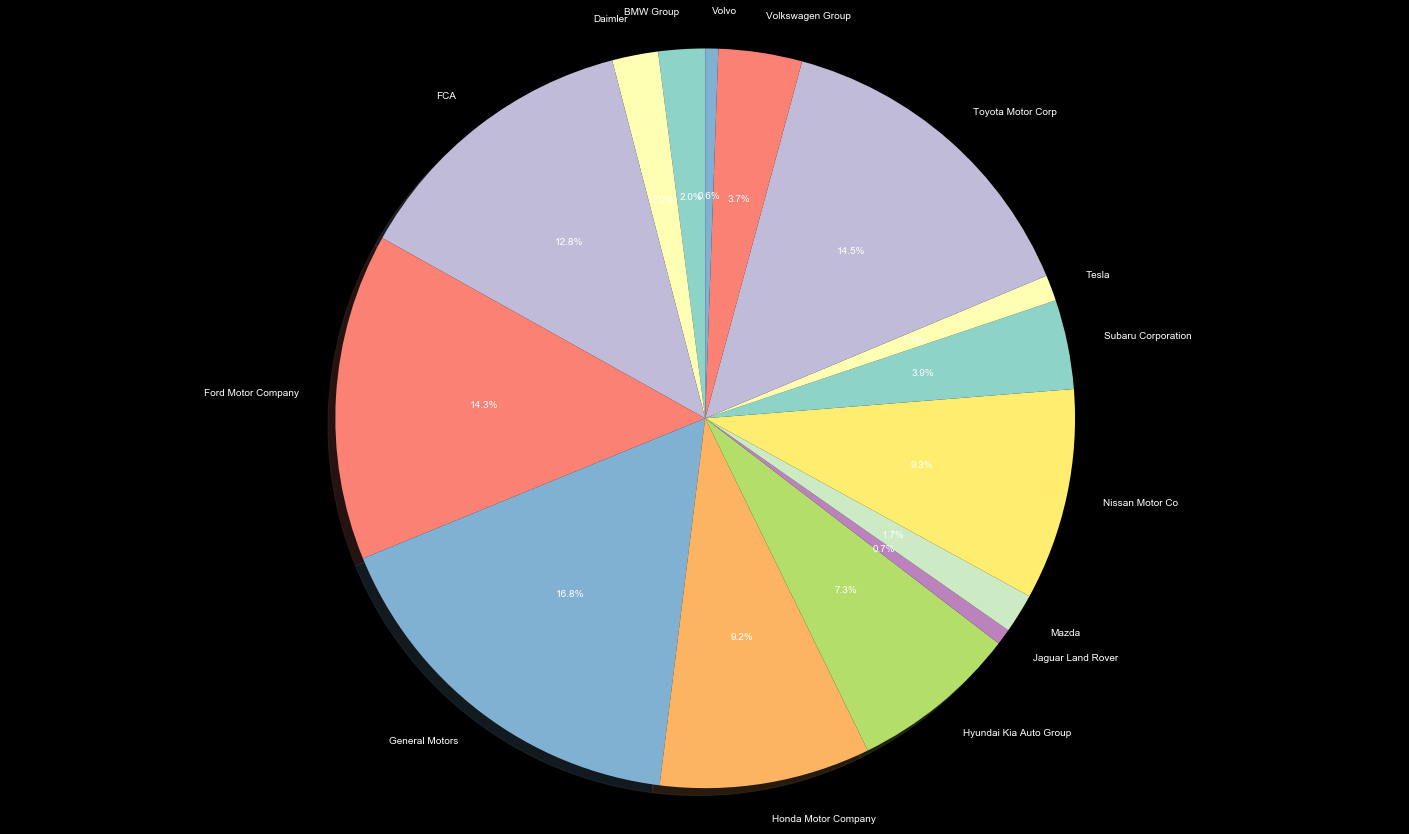

In [85]:
path = 'Automaker.xlsx'
pieChart(path)


In [99]:
def compare(c1,c2,c3,start,end):
    start_default = start
    end_default = end
    connec501 = sqlite3.connect('sp500.db')
    connDb = sqlite3.connect('SPdb2.db')
    df1 = pd.read_sql_query("SELECT * FROM " + c1 + " WHERE Date BETWEEN '" +str(start_default)+ "' AND '" +str(end_default)+"'", connec501)
    df2 = pd.read_sql_query("SELECT * FROM " + c2 + " WHERE Date BETWEEN '" +str(start_default)+ "' AND '" +str(end_default)+"'", connec501)
    df3 = pd.read_sql_query("SELECT * FROM " + c3 + " WHERE Date BETWEEN '" +str(start_default)+ "' AND '" +str(end_default)+"'", connec501)
    df4 = pd.read_sql_query("SELECT * FROM dates", connDb)
    stocks = pd.DataFrame({'Date':df1['Date'],c1: df1["Adj Close"],c2: df2["Adj Close"],c3: df3["Adj Close"]})
    stocks = stocks.set_index(pd.DatetimeIndex(stocks['Date']))
    
    stocks.plot(grid = False,secondary_y = [c3, c2])
    x,y = dropPoints()
#     ax = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
#     x,y = dropPoints()
#     ax.scatter(x, y)
#     ax.plot(stocks.index, stocks[c1],stocks[c2],stocks[c3],linewidth= 1)
    
    # stocks.plot(grid = False,secondary_y = [c3, c2])
    
       
    
    
    
    

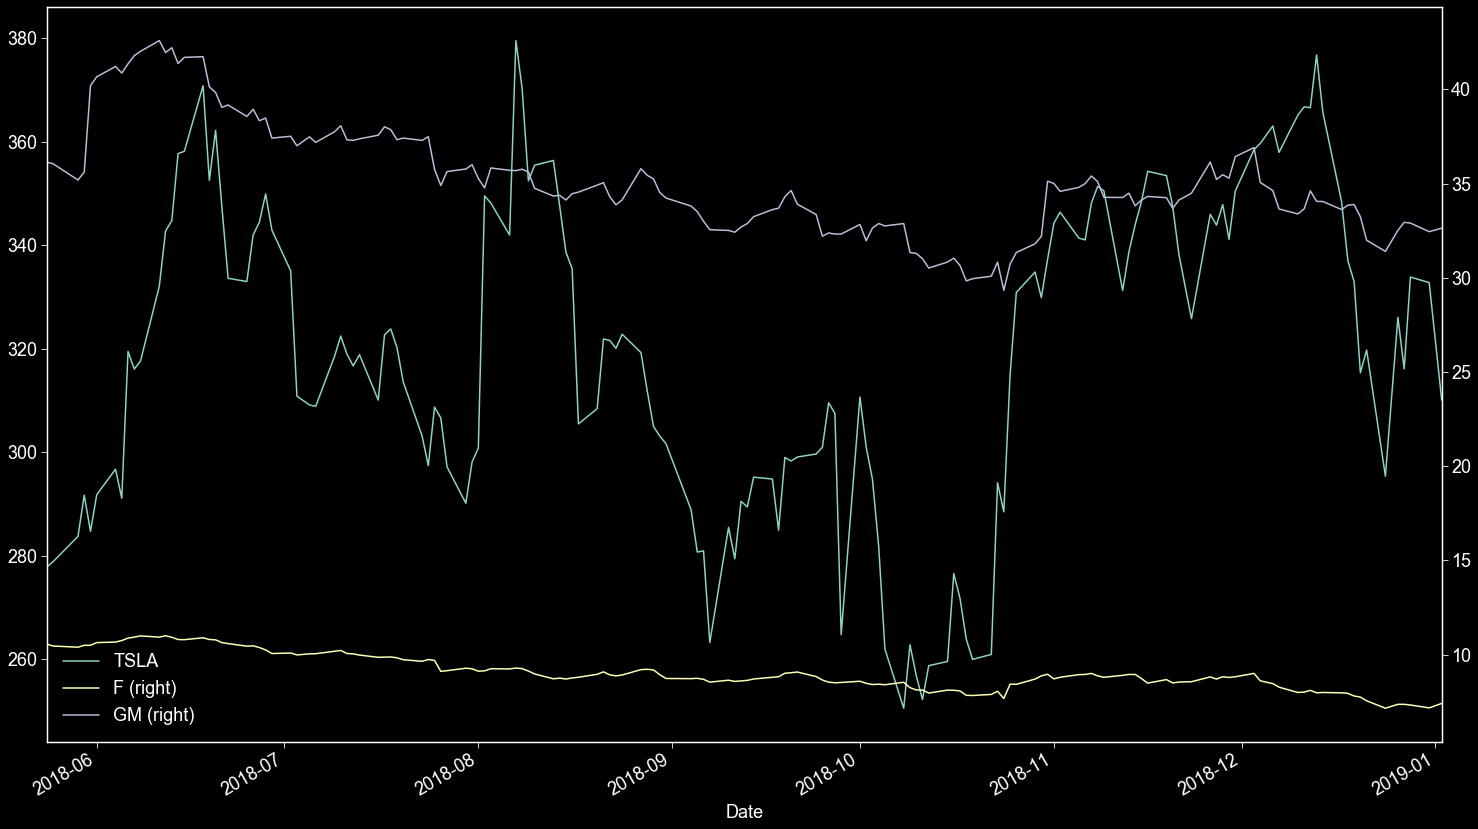

In [100]:

start = dt.datetime(2018, 1, 1)
end = dt.datetime(2019, 8, 30)
compare('TSLA','F','GM',start,end)